<a href="https://colab.research.google.com/github/Sahar-DataScience/arabic-ocr/blob/main/arabic_ocr_with_tesseract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **install dependencies**

In [ ]:
!sudo apt install tesseract-ocr

In [ ]:
!pip install pytesseract

In [ ]:
!sudo apt-get install -y tesseract-ocr-ara

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-ara tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 35 not upgraded.
Need to get 5,461 kB of archives.
After this operation, 17.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ara all 1:4.00~git30-7274cfa-1.1 [645 kB]
Fetched 5,461 kB in 1s (9,478 kB/s)
debconf: unable to ini

# **image processing**

In [ ]:
import cv2
import numpy as np

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
  coords = np.column_stack(np.where(image > 0))
  angle = cv2.minAreaRect(coords)[-1]
  if angle < -45:
    angle = -(90 + angle)
  else:
    angle = -angle
  (h, w) = image.shape[:2]
  center = (w // 2, h // 2)
  M = cv2.getRotationMatrix2D(center, angle, 1.0)
  rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
  return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

In [ ]:
image = cv2.imread("/content/drive/MyDrive/project_test/image 1.jpg")

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)

##check wich preprocessing technique gives best result

In [ ]:
from google.colab.patches import cv2_imshow

###image in gray scale

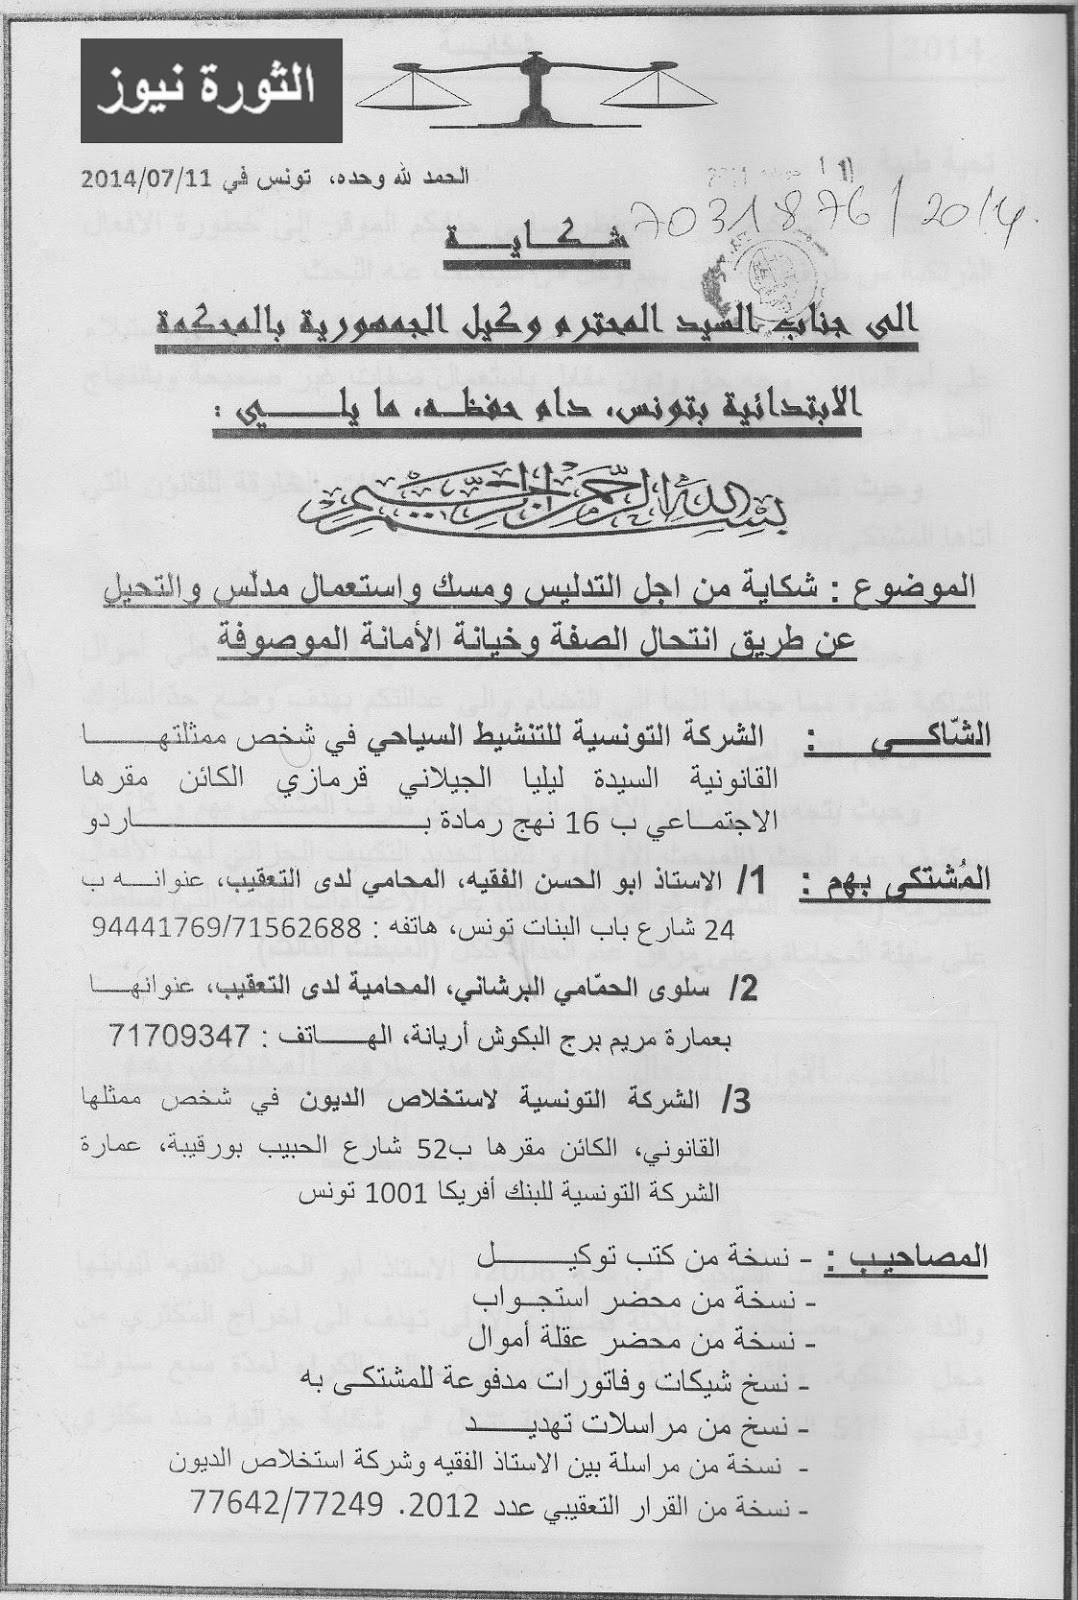

In [ ]:
cv2_imshow(gray)

In [ ]:
pil_gray  = Image.fromarray(gray)

In [ ]:
extracted_txt(pil_gray)

2-1-7 اللمشاسا:

الحمد لله وحدهء تونس في 2014/07/11

> 0

06 مجوشيويي د

الشاكىي_ : الشركة التونسية للتنشيط السياحي في شخص ممثلتها
القانونية السيدة ليليا الجيلاني قرمازي الكائن مقرها
الاجتماعي ب 16 نهج رمادة ب مكار د
المشتكى بهم : 1/ الاستاذ ابو الحسن الفقيه؛ المحامي لدى التعقيب» عنوانه ب
4 شارع باب البنات تونسء هاتفه : 94441769/71562688
2 سلوى الحمّامي البرشانيء المحامية لدى التعقيب؛. غنوانها
بعمارة مريم برج البكوش أريانة: الهتتف : 71709347
3 الشركة التونسية لاستخلاص الديون في شخص ممثلها
القانوني؛ الكائن مقرها ب52 شارع الحبيب بورقيبة» عمارة
الشركة التونسية للبنك أفريكا 1001 تونس
المضاحهدت : - نشخة من كتت ذو كت سل
- نسخة من محضر استجواب
حة من محضر عللة اموال
- نسخ شيكات وفاتورات مدفوعة للمشتكى به
4 نسخ من مراسللات هد
- نسخة من مراسلة بين الاستاذ الفقيه وشركة استخلاص الديون
- نسخة من القرار التعقيبي عدد 2012. 77642/77249

 



###results from binary image as input

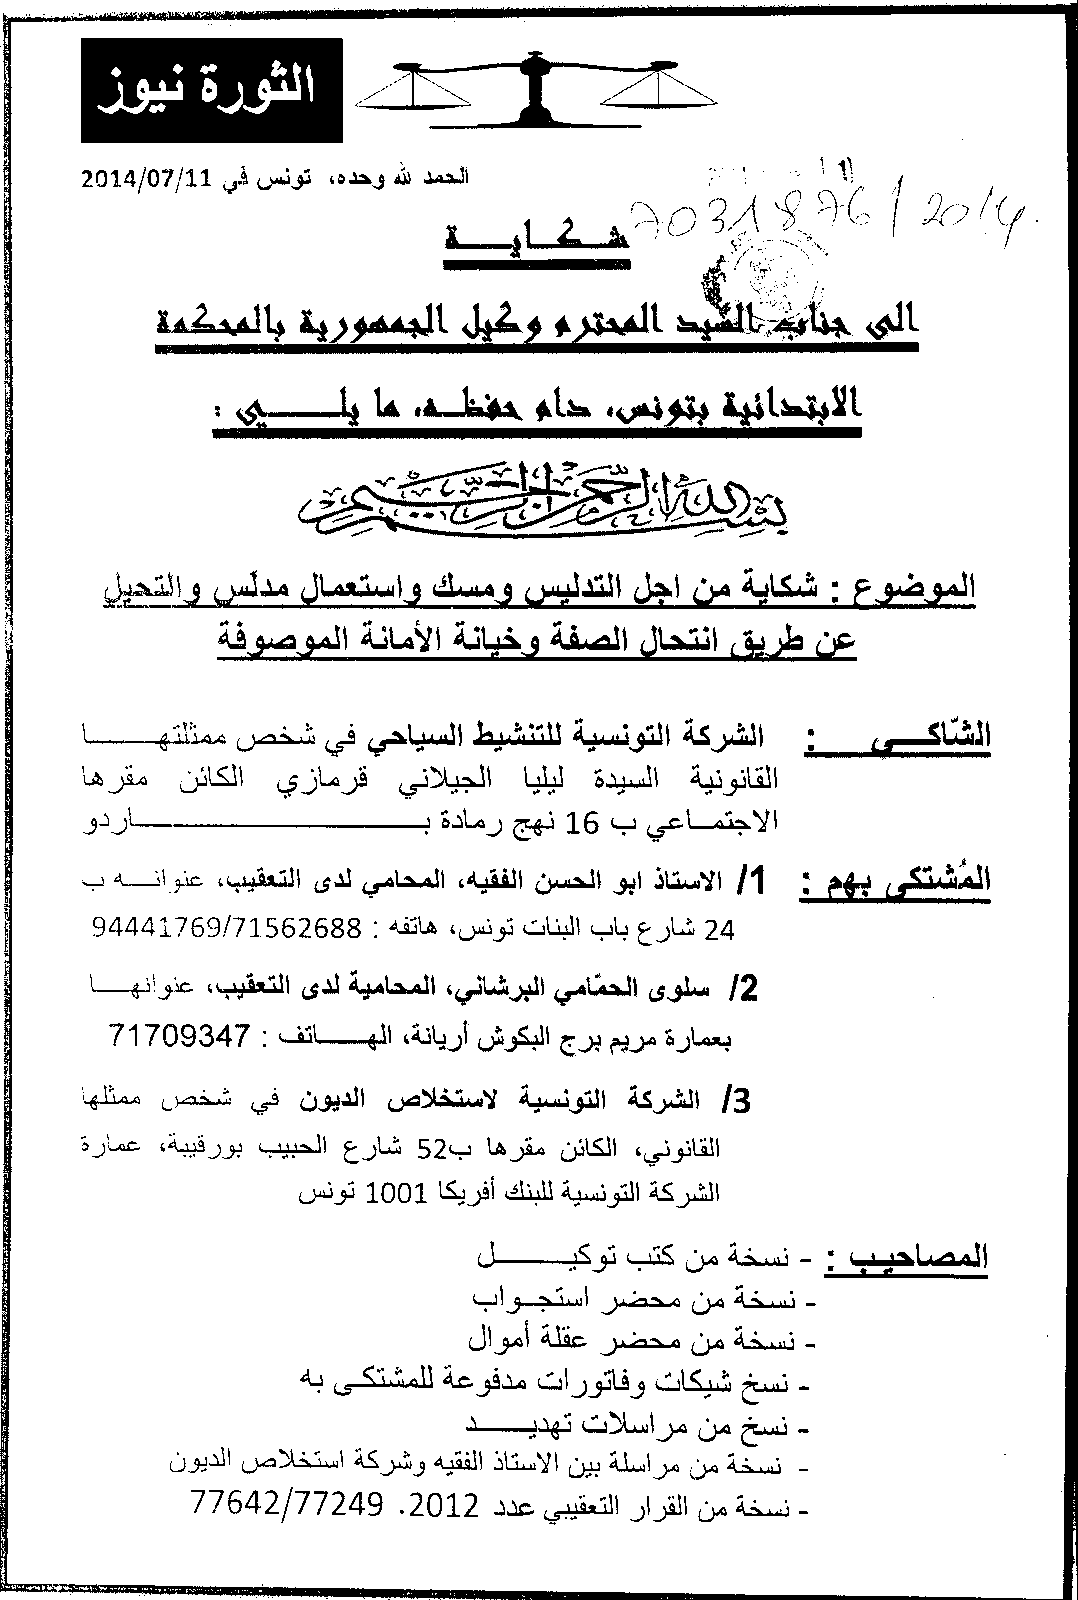

In [ ]:
cv2_imshow(thresh)

In [ ]:
pil_thresh =  Image.fromarray(thresh)
extracted_txt(pil_thresh)

---1--- اللمشفسا:

الحمد لله وحده. تونس في 2014/07/11

11

0 ايه

الشاكي_ : الشركة التونسية للتنشيط السياحي في شخص ممتلتها
القانونية السيدة ليليا الجيلاني قرمازي الكائن مقرها
الاجتماعي ب 16 نهج رمادة ب لاردوق
المشتكى بهم : 1/ الاستاذ ابو الحسن الفقيه؛ المحامي لدى التعقيب» عنوانه ب
4 شارع باب البنات تونسء هاتفه : 94441769/71562688
2 سلوى الحمّامي البرشاني» المحامية لدى التعقيب؛ عنوائها
بعمارة مريم برج البكوش أريانة الهاف : 71709347
3 الشركة التونسية لاستخلاص الديون في شخص ممثلها
القانونيء» الكائن مقرها ب52 شارع الحبيب بورقيبة» عمارة
الشركة التونسية للبنك أفريكا 1001 تونس
المصاحيب : - نسخة من كتب توكيل
- نسخة من محضر استجواب
- نسخة من محضر عقلة أموال
- نسخ شيكات وفاتورات مدفوعة للمشتكى به
- نسخ من مراسللات تهديد
- نسخة من مراسلة بين الاستاذ الفقيه وشركة استخلاص الديون
- نسخة من القرار التعقيبي عدد 2012. 77642/77249

 



###Ocr text extraction function with Tesseract

In [ ]:
def extracted_txt(img):
  # Define language (replace 'ara' with your desired language code)
  lang = 'arab'

# Perform OCR
  text = pytesseract.image_to_string(img , lang='ara',config= ".")

# Print the extracted text
  return text

In [ ]:
#You can specify keywords that you want to search for in the extracted text. Here’s an example of how to do it:

# Define the keywords you want to search for
keywords = ['المشتكى بهم', 'الشاكي_']

# Initialize a dictionary to store extracted values
extracted_values = {}

# Iterate through the extracted text and search for keywords
for page_num, text in enumerate(extracted_text, 1):
for keyword in keywords:
if keyword in text:
# Extract the value following the keyword
lines = text.split('\n')
for line in lines:
if keyword in line:
value = line.replace(keyword, ‘’).strip()
extracted_values[keyword] = value
break

Step 7: Displaying Results

You can print or display the extracted values. For example:

# Print or process the extracted values
for keyword, value in extracted_values.items():
print(f”{keyword}: {value}”)

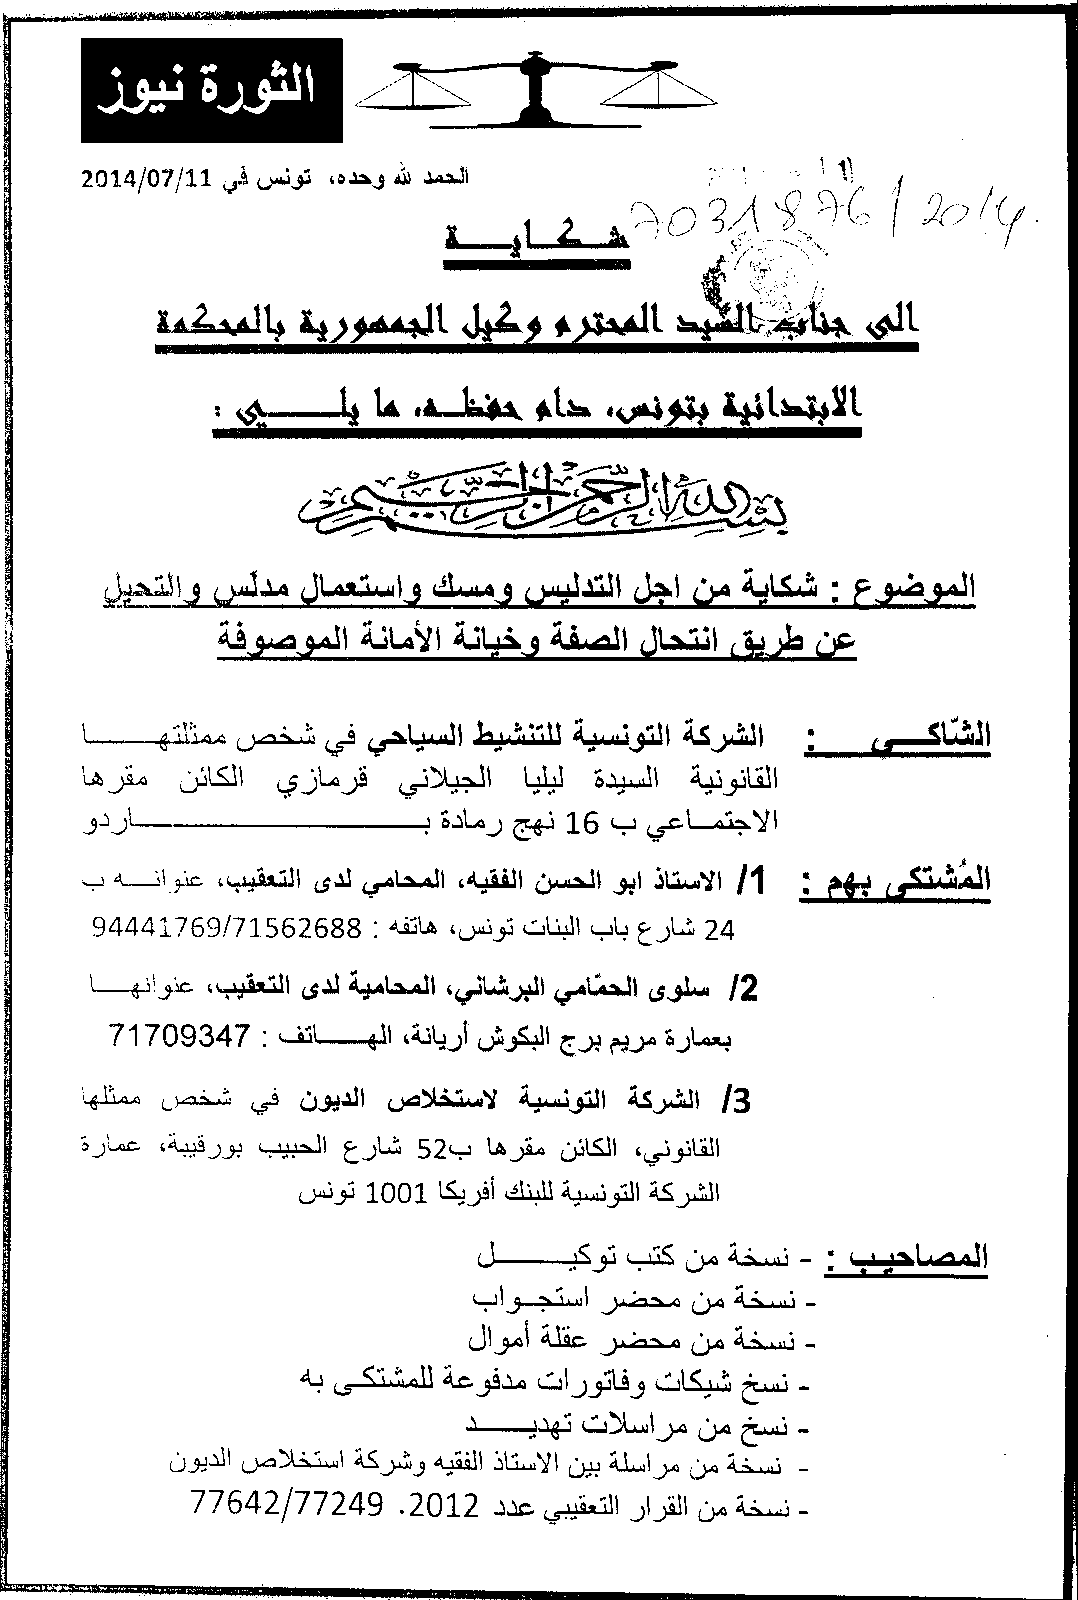

In [ ]:
cv2_imshow(threshold_img)

In [ ]:
grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Apply threshold to convert to binary image
threshold_img = cv2.threshold(grey, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
# Pass the image through pytesseract
text2 = pytesseract.image_to_string(threshold_img, lang='ara' )
# Print the extracted text
print(text2)

---1--- اللمشفسا:

الحمد لله وحده. تونس في 2014/07/11

11

0 ايه

الشاكي_ : الشركة التونسية للتنشيط السياحي في شخص ممتلتها
القانونية السيدة ليليا الجيلاني قرمازي الكائن مقرها
الاجتماعي ب 16 نهج رمادة ب لاردوق
المشتكى بهم : 1/ الاستاذ ابو الحسن الفقيه؛ المحامي لدى التعقيب» عنوانه ب
4 شارع باب البنات تونسء هاتفه : 94441769/71562688
2 سلوى الحمّامي البرشاني» المحامية لدى التعقيب؛ عنوائها
بعمارة مريم برج البكوش أريانة الهاف : 71709347
3 الشركة التونسية لاستخلاص الديون في شخص ممثلها
القانونيء» الكائن مقرها ب52 شارع الحبيب بورقيبة» عمارة
الشركة التونسية للبنك أفريكا 1001 تونس
المصاحيب : - نسخة من كتب توكيل
- نسخة من محضر استجواب
- نسخة من محضر عقلة أموال
- نسخ شيكات وفاتورات مدفوعة للمشتكى به
- نسخ من مراسللات تهديد
- نسخة من مراسلة بين الاستاذ الفقيه وشركة استخلاص الديون
- نسخة من القرار التعقيبي عدد 2012. 77642/77249

 

